In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
!pip install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.test_model, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for CMCC-CM2-SR5: ['/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r1i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_ps

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data values:  [[[101620.49  101624.125 101642.734 ... 101662.61  101605.47  101601.92 ]
  [101738.93  101745.01  101749.8   ... 101877.82  101801.875 101682.766]
  [101850.11  101837.23  101845.76  ... 102024.    101863.164 101678.516]
  ...
  [101500.055 101479.83  101397.94  ... 100371.086 100429.9   100500.45 ]
  [101475.13  101429.34  101397.58  ... 100483.266 100535.01  100595.45 ]
  [101523.766 101504.414 101507.69  ... 100809.516 100832.95  100860.31 ]]

 [[101632.61  101628.59  101642.12  ... 101618.12  101569.48  101570.266]
  [101761.25  101764.01  101762.72  ... 101830.836 101758.766 101643.81 ]
  [101881.766 101864.59  101867.65  ... 101973.92  101815.586 101631.98 ]
  ...
  [101299.56  101268.805 101175.65  ... 100165.27  100207.32  100253.45 ]
  [101233.69  101177.69  101140.164 ... 100218.85  100253.266 100288.02 ]
  [101272.16  101248.48  101244.38  ... 100462.36  100476.45  100490.46 ]]

 [[101611.65  101613.445 101633.16  ... 1016

In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid, 
                               forecast_range, season, obs_path, obs_var_name)

Region grid dimensions: {'lon1': 280, 'lon2': 37.5, 'lat1': 77.5, 'lat2': 20}

/opt/jaspy/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]



Forecast range: 2 - 9
Rolling mean range: 8


In [8]:
# # check the values of obs
obs["var151"]

# count how many value are NaN
nan_count = np.isnan(obs["var151"]).sum()

print(nan_count.values)

# count how many values are not NaN
not_nan_count = np.count_nonzero(obs["var151"])

print(not_nan_count)

# calculate the percentage of NaN values
nan_percentage = nan_count / (nan_count + not_nan_count) * 100

# print the percentage of NaN values
print("Percentage of NaN values in obs: ", nan_percentage)

8064
72576
Percentage of NaN values in obs:  <xarray.DataArray 'var151' ()>
dask.array<mul, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


In [9]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>

Observations dimensions: Frozen({'time': 63, 'lon': 48, 'lat': 24})
Observations variables: <xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>
Observations latitude values: [77.5 75.  72.5 70.  67.5 65.  62.5 60.  57.5 55.  52.5 50.  47.5 45.
 42.5 40.  37.5 35.  32.5 30.  27.5 25.  22.5 20. ]
Observations longitude values: [  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5 350.  352.5 355.  357.5]
Observations variable: [[n

/opt/jaspy/lib/python3.10/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/jaspy/lib/python3.10/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


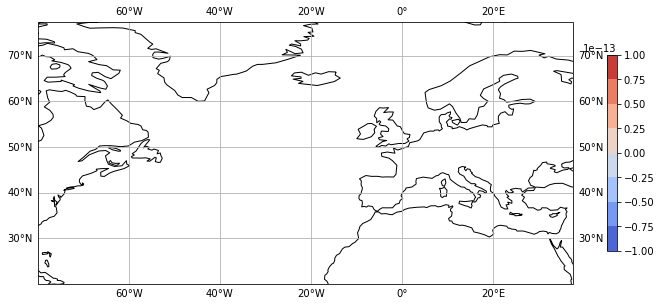

In [10]:
# # Attempt to plot the data
fnc.plot_obs_data(obs)

In [18]:
print(variable_data["CMCC-CM2-SR5"])

AttributeError: 'list' object has no attribute 'values'

In [12]:
# fnc.plot_model_data(variable_data, dic.test_model, dic.gif_plots_dir)

In [13]:
# print((np.shape(variable_data['NorCPM1'])))

KeyError: 'NorCPM1'

In [14]:
print(type(obs))

<class 'xarray.core.dataset.Dataset'>


In [15]:
print(type(dic.test_model_norcpm))

<class 'list'>


In [16]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.test_model)

ensemble members shape (20, 60, 24, 48)
(60, 24, 48)
<class 'numpy.ndarray'>
[[[50814.22  50813.977 50822.258 ... 50833.105 50802.207 50801.78 ]
  [50875.27  50877.344 50879.242 ... 50940.65  50900.273 50843.543]
  [50932.56  50925.926 50929.96  ... 51014.484 50933.523 50843.527]
  ...
  [50743.29  50728.562 50688.594 ... 50183.395 50213.85  50247.418]
  [50728.504 50706.77  50690.336 ... 50244.387 50268.395 50295.21 ]
  [50739.918 50736.46  50739.348 ... 50407.094 50418.1   50430.816]]

 [[50812.438 50812.984 50823.35  ... 50837.99  50808.29  50806.14 ]
  [50876.27  50879.75  50882.67  ... 50943.484 50904.793 50847.793]
  [50936.6   50931.39  50936.055 ... 51015.55  50936.14  50845.39 ]
  ...
  [50704.527 50688.88  50644.45  ... 50142.65  50165.297 50190.914]
  [50675.992 50652.805 50634.918 ... 50188.914 50206.3   50224.65 ]
  [50685.973 50679.54  50681.96  ... 50335.684 50341.24  50347.715]]

 [[50792.855 50793.734 50803.207 ... 50849.79  50814.562 50811.086]
  [50849.367 50851.18  

In [ ]:
# print the rfield
print(rfield)
# visualise the distribution of r values
# as a histogram
plt.hist(rfield, bins=20)

In [ ]:
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.test_model, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid)

In [ ]:
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid)